In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_percentage_error as MAPE

In [49]:
import warnings
warnings.filterwarnings('ignore')

In [50]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 96F3-7600

 Directory of C:\Users\Beauty\Documents\ExcelR\Assignments\A_18_Forecasting

31-07-2022  21:20    <DIR>          .
31-07-2022  21:20    <DIR>          ..
31-07-2022  17:39    <DIR>          .ipynb_checkpoints
31-07-2022  18:27             1,170 Airlines.csv
14-07-2022  08:50             9,559 Airlines+Data.xlsx
31-07-2022  21:20           390,285 assignment18_forecasting.ipynb
31-07-2022  17:42               684 CocaCola_Sales.csv
14-07-2022  08:50             9,422 CocaCola_Sales_Rawdata.xlsx
14-07-2022  08:50               233 Problem_statement.txt
               6 File(s)        411,353 bytes
               3 Dir(s)  130,660,478,976 bytes free


# Coco-cola sales 

Forecast the CocaCola prices. Prepare a document for each model explaining 
how many dummy variables you have created and RMSE value for each model. Finally which model you will use for 
Forecasting.


In [51]:
df1=pd.read_csv("CocaCola_Sales.csv")

In [52]:
df1.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [53]:
df1.shape

(42, 2)

In [54]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


<AxesSubplot:>

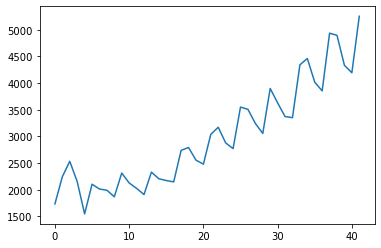

In [55]:
df1['Sales'].plot()

As we can see that the data is not stationary, hence we have to use "Data Driven Models" only.

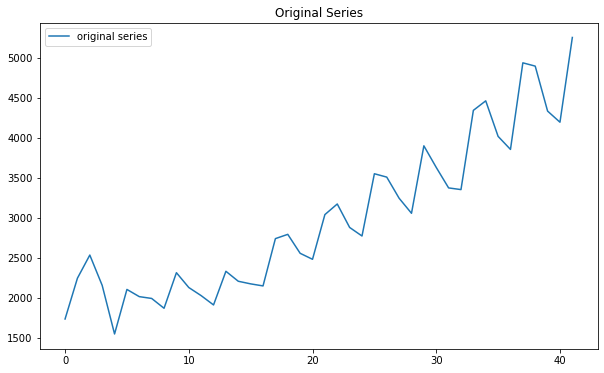

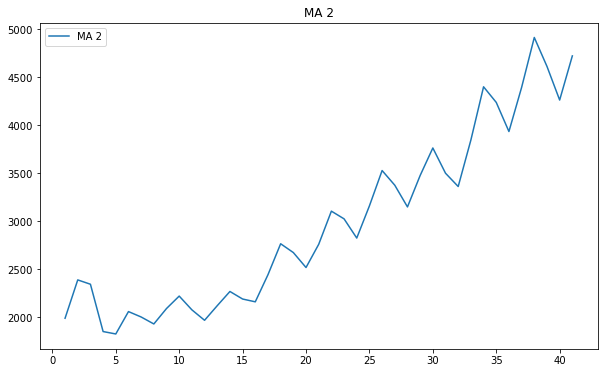

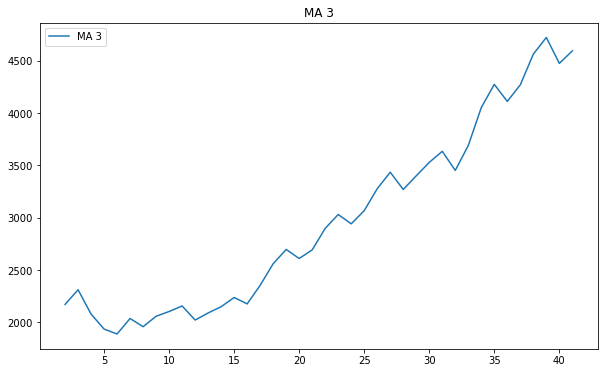

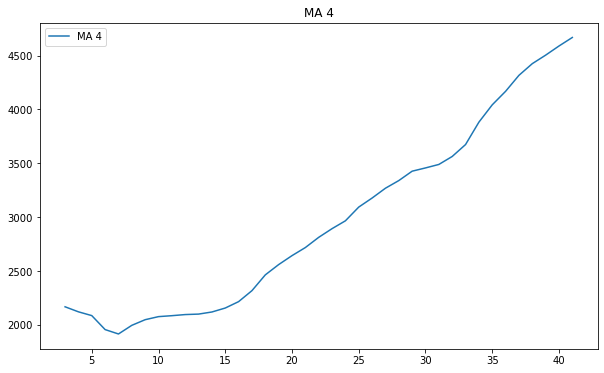

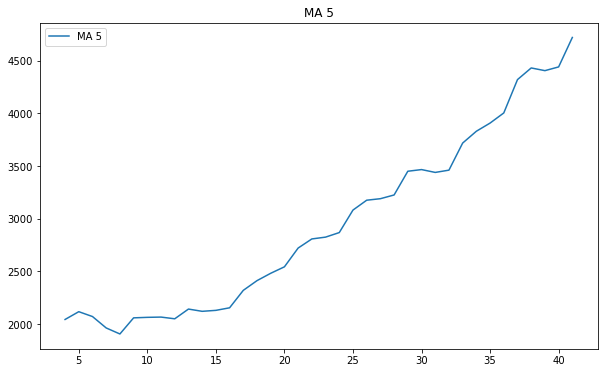

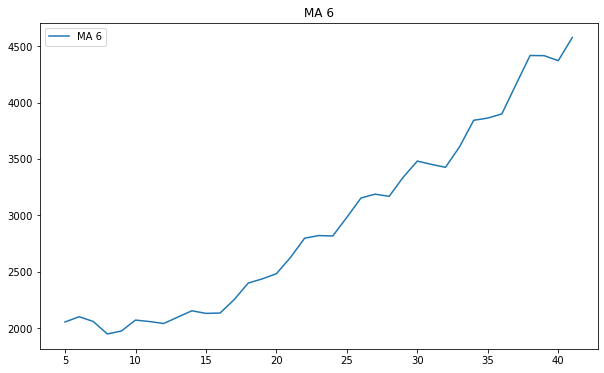

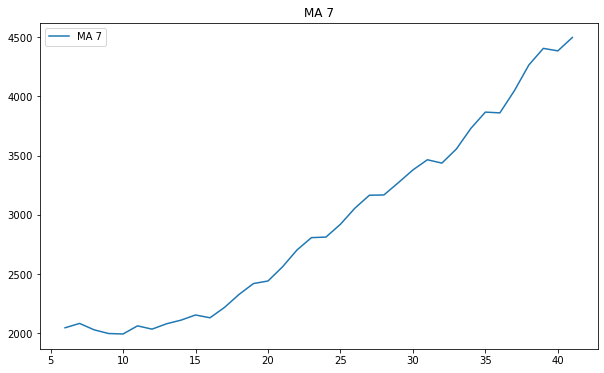

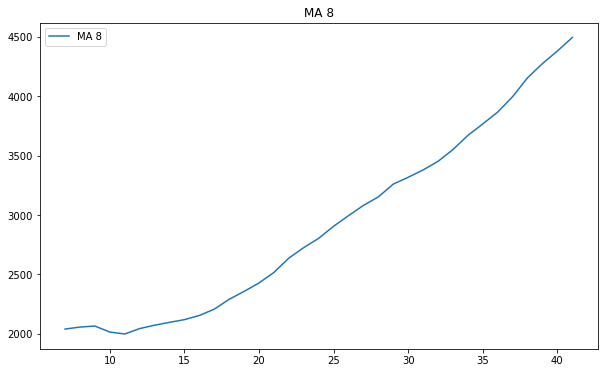

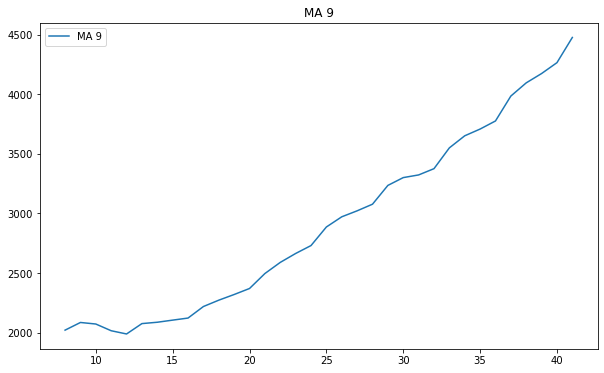

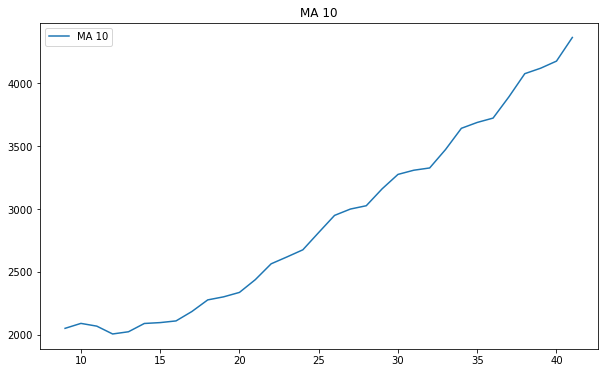

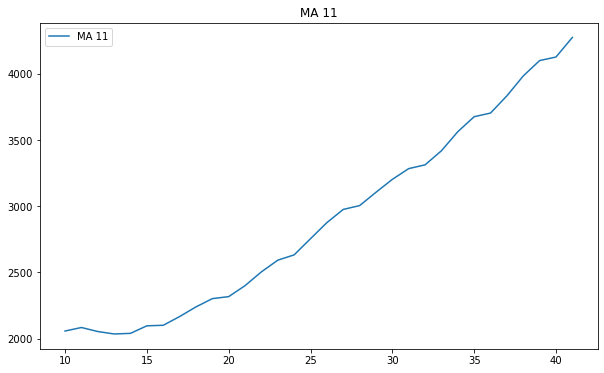

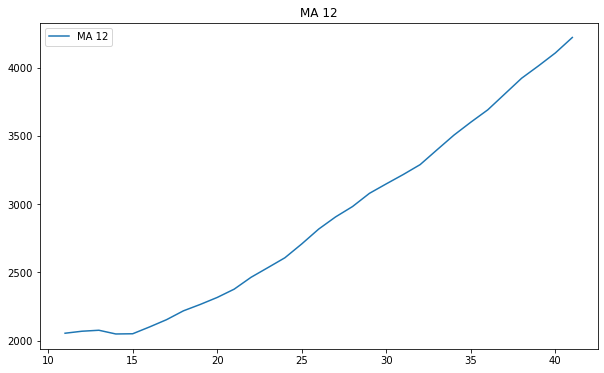

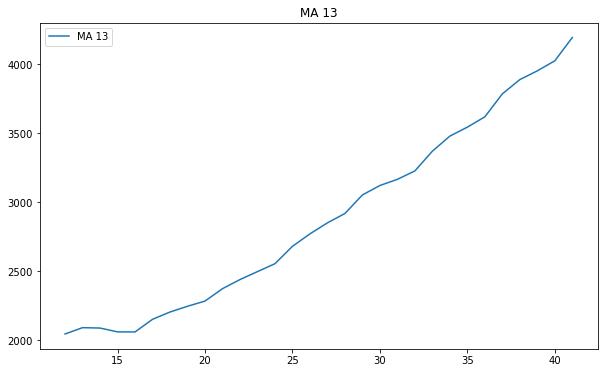

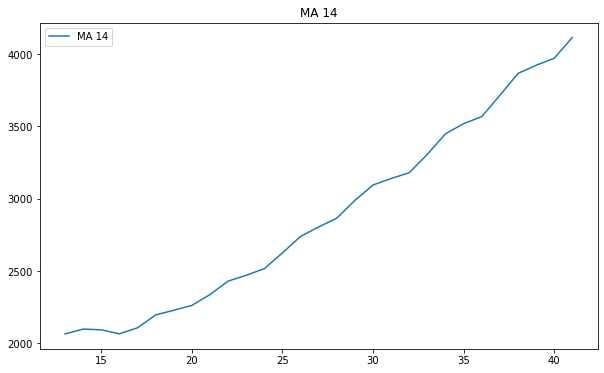

In [56]:
# Optimal Window Size 
plt.figure(figsize=(10,6))
df1['Sales'].plot(label='original series')
plt.legend(loc='best')
plt.title('Original Series')

for i in range(2,15):
    plt.figure(figsize=(10,6))
    df1['Sales'].rolling(i).mean().plot(label='MA '+str(i))
    plt.legend(loc='best')
    plt.title("MA "+str(i))
    plt.show()

The Optimal Window Size is "4", because the data is quarterly data.

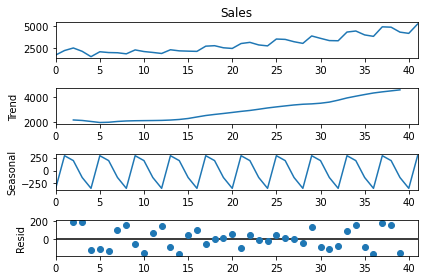

In [57]:
# Decomposition of data
decom=seasonal_decompose(df1['Sales'],model='additive',period=4)
decom.plot()
plt.show()

In [58]:
# Splitting the data into train and test
train1=df1.head(35)
test1=df1.tail(7)

# Simple Exeponential model

In [59]:
# For different smoothing level

j= np.arange(0.1,1,0.05)
l=[]
for i in j:
    se_model1=SimpleExpSmoothing(train1['Sales']).fit(smoothing_level=i)
    se_pred1=se_model1.predict(start=test1.index[0],end=test1.index[-1])
    se_mape1=MAPE(test1['Sales'],se_pred1)
    print("MAPE score::",np.round(se_mape1,3)," for smoothing level:: ",str(i))
    l.append((i,se_mape1))

MAPE score:: 0.256  for smoothing level::  0.1
MAPE score:: 0.2  for smoothing level::  0.15000000000000002
MAPE score:: 0.164  for smoothing level::  0.20000000000000004
MAPE score:: 0.138  for smoothing level::  0.25000000000000006
MAPE score:: 0.123  for smoothing level::  0.30000000000000004
MAPE score:: 0.112  for smoothing level::  0.3500000000000001
MAPE score:: 0.105  for smoothing level::  0.40000000000000013
MAPE score:: 0.1  for smoothing level::  0.45000000000000007
MAPE score:: 0.096  for smoothing level::  0.5000000000000001
MAPE score:: 0.094  for smoothing level::  0.5500000000000002
MAPE score:: 0.093  for smoothing level::  0.6000000000000002
MAPE score:: 0.093  for smoothing level::  0.6500000000000001
MAPE score:: 0.093  for smoothing level::  0.7000000000000002
MAPE score:: 0.095  for smoothing level::  0.7500000000000002
MAPE score:: 0.096  for smoothing level::  0.8000000000000002
MAPE score:: 0.097  for smoothing level::  0.8500000000000002
MAPE score:: 0.098  f

In [60]:
se_result1=pd.DataFrame(l,columns=['Smoothing_level','MAPE'])
se_result1.sort_values(by=['MAPE'])

,Smoothing_level,MAPE
12,0.70,0.092924
11,0.65,0.092951
10,0.60,0.093417
9,0.55,0.093931
13,0.75,0.094654
8,0.50,0.096143
14,0.80,0.096145
15,0.85,0.097388
16,0.90,0.098375
17,0.95,0.099099


We are getting least error with smoothing level=0.7

In [61]:
# Creating model with smoothing level=0.7

se_model1=SimpleExpSmoothing(train1['Sales']).fit(smoothing_level=0.7)
se_pred1=se_model1.predict(start=test1.index[0],end=test1.index[-1])
se_mape1=MAPE(test1['Sales'],se_pred1)
print("MAPE score::",np.round(se_mape1,3))

MAPE score:: 0.093


In [62]:
se_pred1

35    4338.9371
36    4338.9371
37    4338.9371
38    4338.9371
39    4338.9371
40    4338.9371
41    4338.9371
dtype: float64

# Double Exponential model

In [90]:
# For different smooting trends and smoothing levels
alpha=np.arange(0.1,1,0.1)
beta=np.arange(0.1,1,0.1)
A=[]
for i in alpha:
    for j in beta:
        de_model1=Holt(train1['Sales']).fit(smoothing_level=i,smoothing_trend=j)
        de_pred1=de_model1.predict(start=test1.index[0],end=test1.index[-1])
        de_mape1=MAPE(test1['Sales'],de_pred1)
        print("MAPE score:: ",np.round(de_mape1,3),"for smoothing_level= ",str(i),"smoothing_trend= ",str(j))
        A.append((i,j,de_mape1))

MAPE score::  0.088 for smoothing_level=  0.1 smoothing_trend=  0.1
MAPE score::  0.081 for smoothing_level=  0.1 smoothing_trend=  0.2
MAPE score::  0.088 for smoothing_level=  0.1 smoothing_trend=  0.30000000000000004
MAPE score::  0.089 for smoothing_level=  0.1 smoothing_trend=  0.4
MAPE score::  0.087 for smoothing_level=  0.1 smoothing_trend=  0.5
MAPE score::  0.084 for smoothing_level=  0.1 smoothing_trend=  0.6
MAPE score::  0.081 for smoothing_level=  0.1 smoothing_trend=  0.7000000000000001
MAPE score::  0.08 for smoothing_level=  0.1 smoothing_trend=  0.8
MAPE score::  0.079 for smoothing_level=  0.1 smoothing_trend=  0.9
MAPE score::  0.082 for smoothing_level=  0.2 smoothing_trend=  0.1
MAPE score::  0.088 for smoothing_level=  0.2 smoothing_trend=  0.2
MAPE score::  0.087 for smoothing_level=  0.2 smoothing_trend=  0.30000000000000004
MAPE score::  0.086 for smoothing_level=  0.2 smoothing_trend=  0.4
MAPE score::  0.085 for smoothing_level=  0.2 smoothing_trend=  0.5
MA

In [91]:
de_result1=pd.DataFrame(A,columns=['Alpha','Beta','MAPE'])
de_result1.sort_values(by='MAPE',ascending=True)

,Alpha,Beta,MAPE
8,0.1,0.9,0.078861
7,0.1,0.8,0.079749
1,0.1,0.2,0.081034
6,0.1,0.7,0.081441
9,0.2,0.1,0.082351
...,...,...,...
70,0.8,0.8,0.395013
71,0.8,0.9,0.408064
61,0.7,0.8,0.413172
53,0.6,0.9,0.429917


We are getting minimum error for smoothing_level=0.1 and smoothing_trend=0.9

In [65]:
# Creating model using optimal values

de_model1=Holt(train1['Sales']).fit(smoothing_level=0.1,smoothing_trend=0.9)
de_pred1=de_model1.predict(start=test1.index[0],end=test1.index[-1])
de_mape1=MAPE(test1['Sales'],de_pred1)
print("MAPE score:: ",np.round(de_mape1,3))

MAPE score::  0.079


In [66]:
de_pred1

35    4017.742648
36    4128.390631
37    4239.038615
38    4349.686599
39    4460.334582
40    4570.982566
41    4681.630550
dtype: float64

# Holt Winter's model

In [104]:
# Holt Winters model
hw_model1=ExponentialSmoothing(train1['Sales'],trend='add',seasonal='add',seasonal_periods=4).fit()
hw_pred1=hw_model1.predict(start=test1.index[0],end=test1.index[-1])
hw_mape1=MAPE(test1['Sales'],hw_pred1)
print("MAPE score:: ",np.round(hw_mape1,3))

MAPE score::  0.036


In [105]:
forecast=hw_model.forecast(10)
forecast

35    4068.182934
36    4018.686500
37    4718.656271
38    4683.756696
39    4540.275025
40    4439.708024
41    5209.258739
42    4994.216067
43    4811.091422
44    4843.015758
dtype: float64

# Holt Winter's model is giving least error out of all models, hence, we will finally use that model for Forecasting.

# Airlines 

Forecast the Airlines Passenger Count. Prepare a document for each model explaining how many dummy variables you have created and RMSE value for each model. Finally which model you will use for Forecasting.

In [70]:
df2=pd.read_csv("Airlines.csv")

In [71]:
df2

,Month,Passengers
0,Jan-95,112
1,Feb-95,118
2,Mar-95,132
3,Apr-95,129
4,May-95,121
...,...,...
91,Aug-02,405
92,Sep-02,355
93,Oct-02,306
94,Nov-02,271


In [72]:
df2.shape

(96, 2)

In [73]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       96 non-null     object
 1   Passengers  96 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


<AxesSubplot:>

<Figure size 1080x576 with 0 Axes>

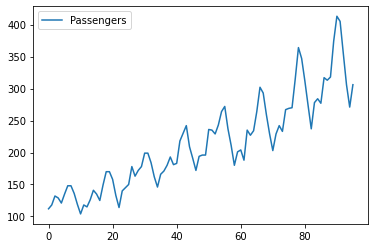

In [78]:
plt.figure(figsize=(15,8))
df2.plot()

As we can see that the data is not stationary, hence we have to use "Data Driven Models" only.

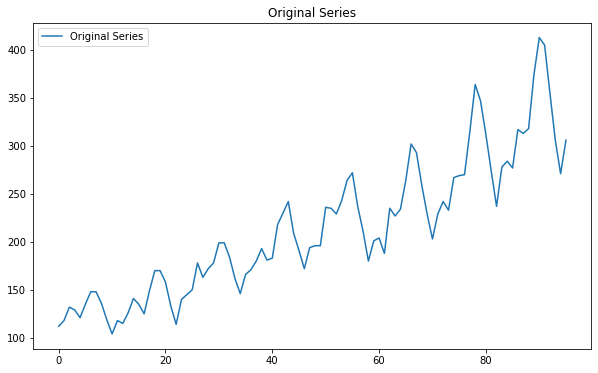

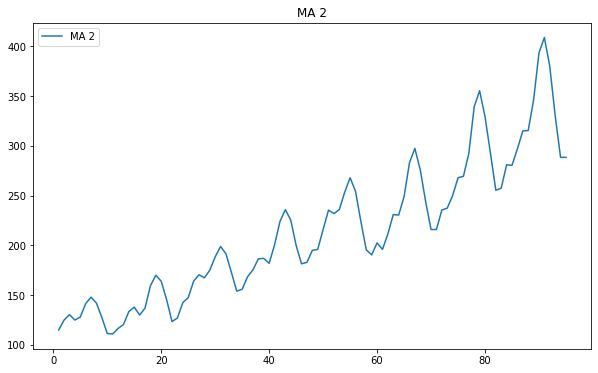

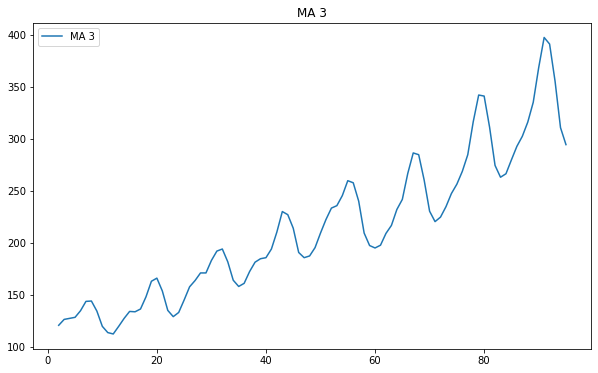

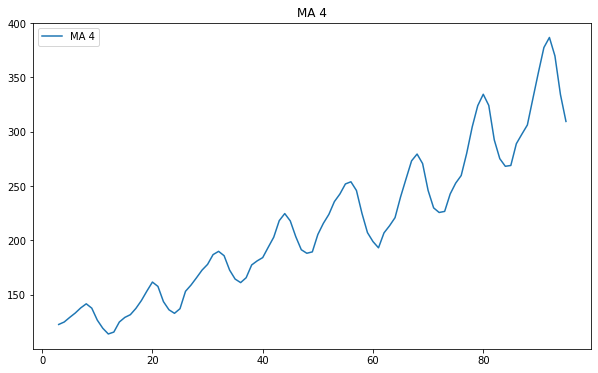

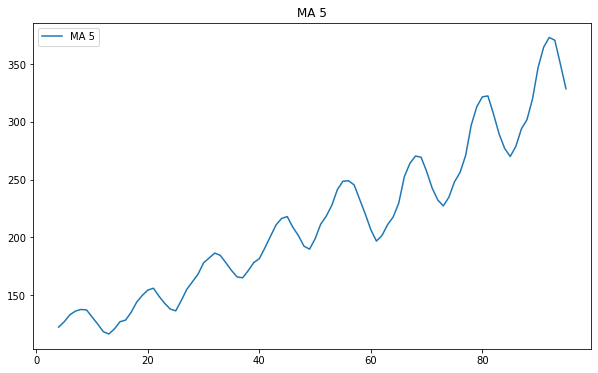

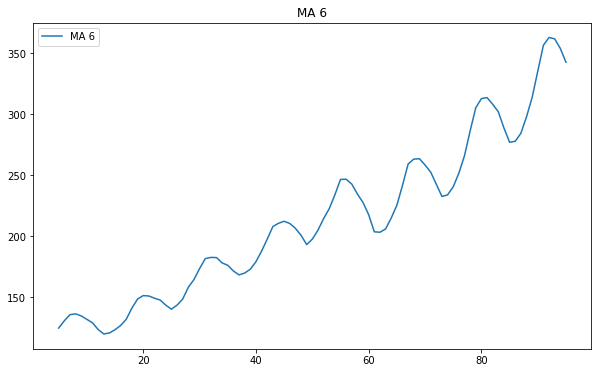

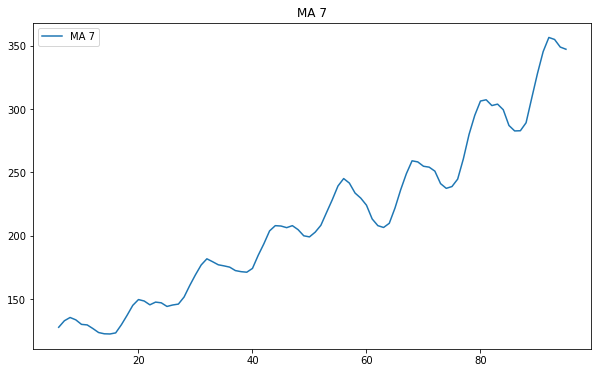

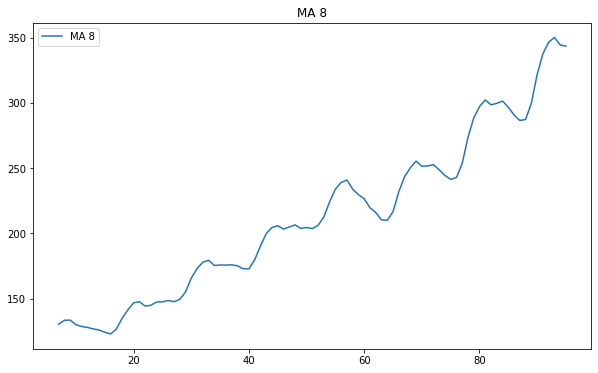

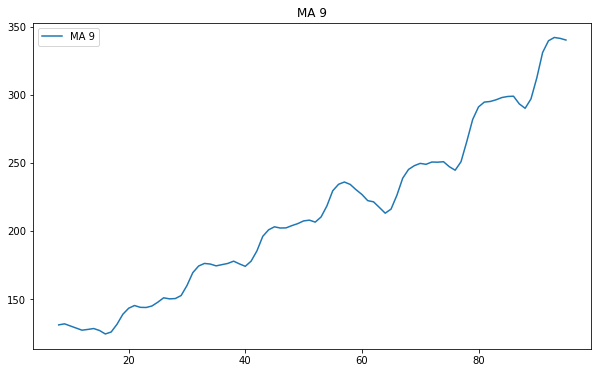

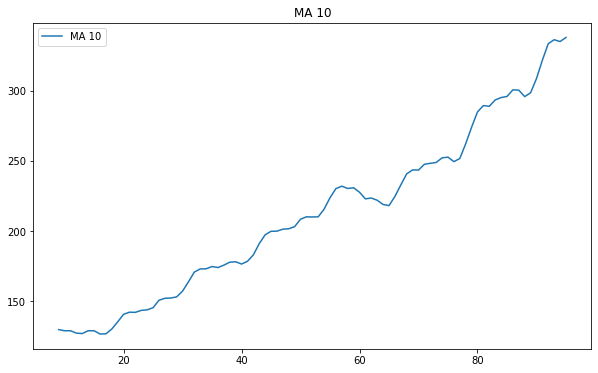

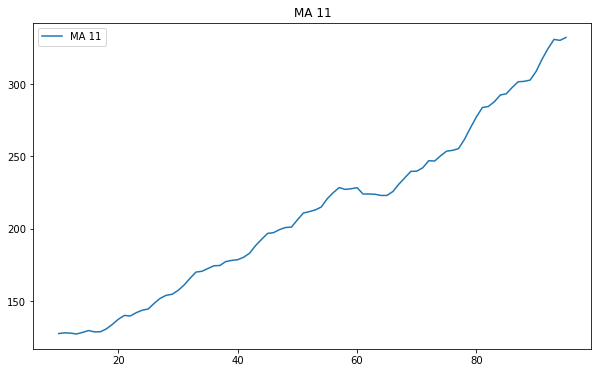

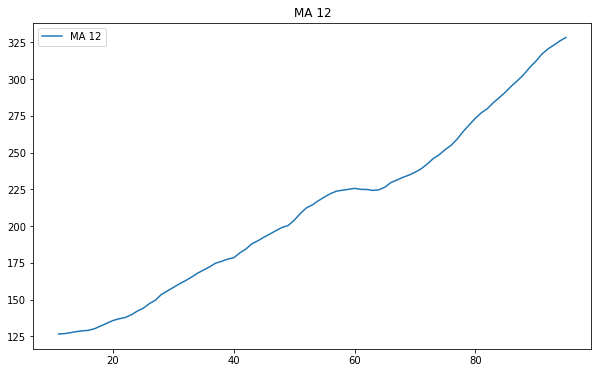

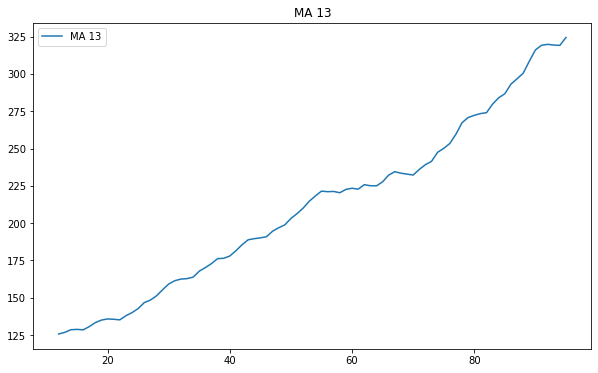

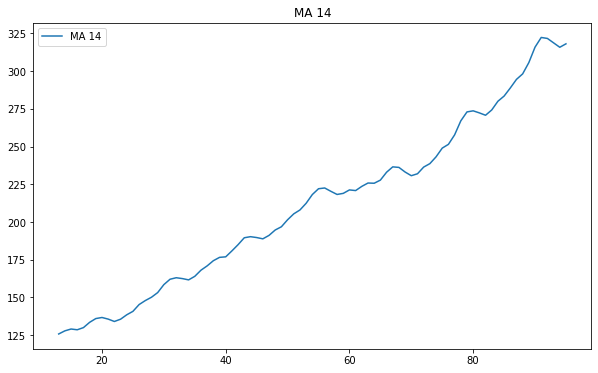

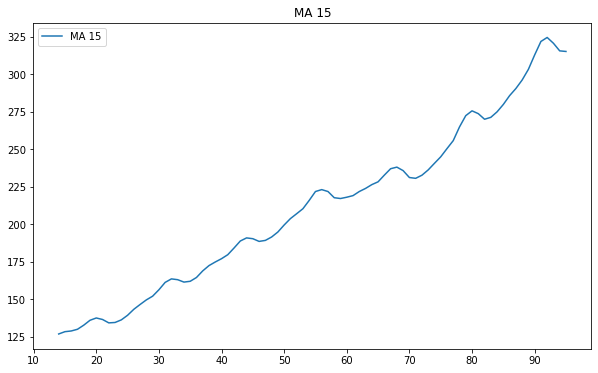

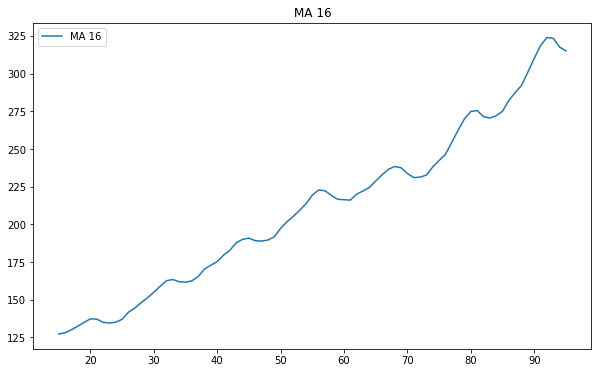

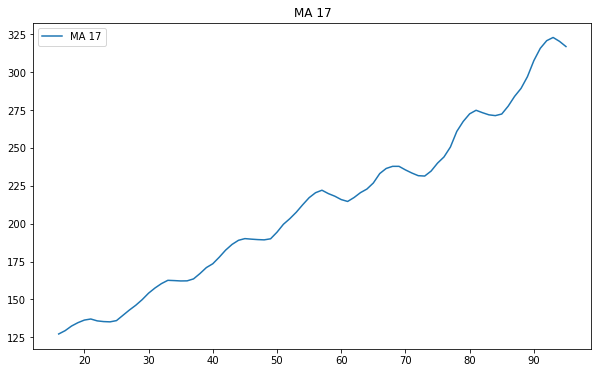

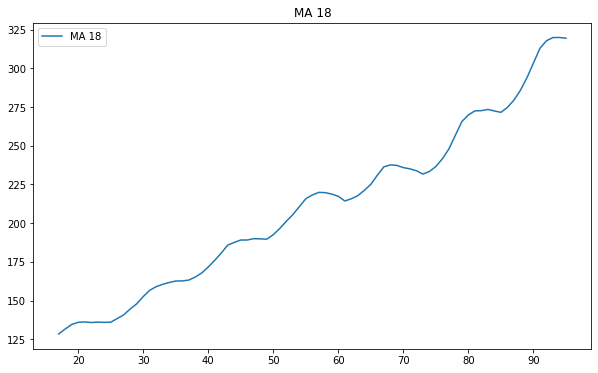

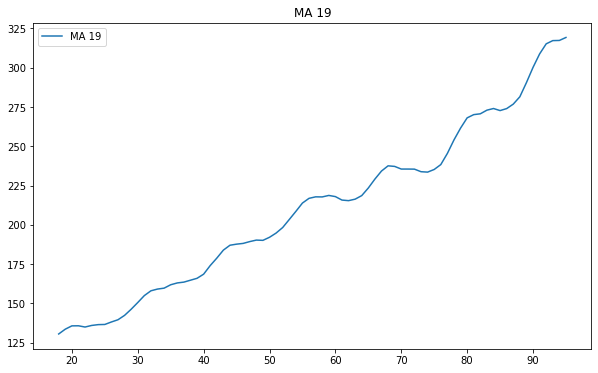

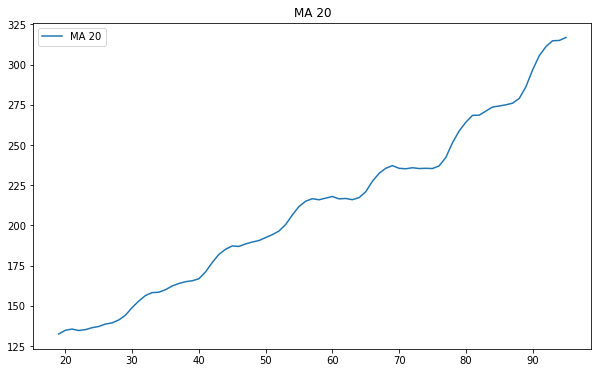

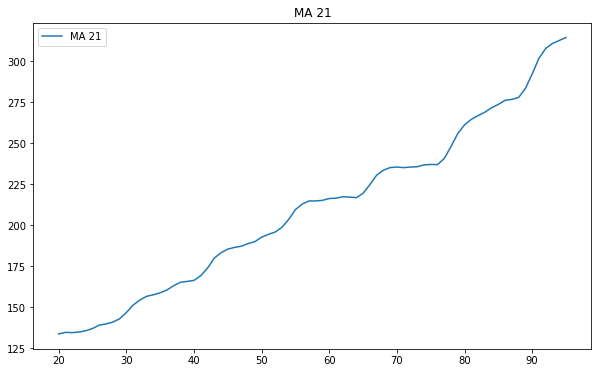

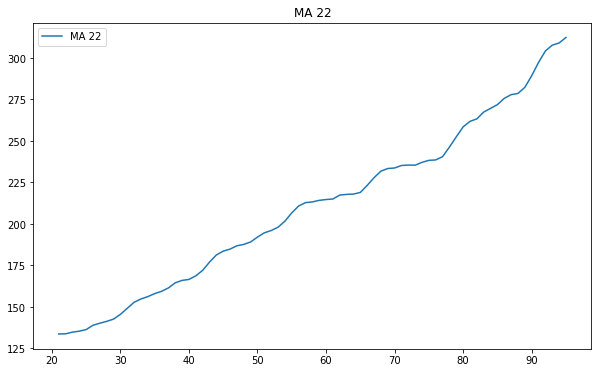

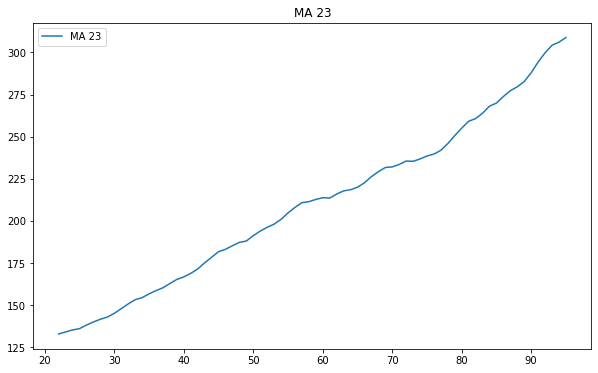

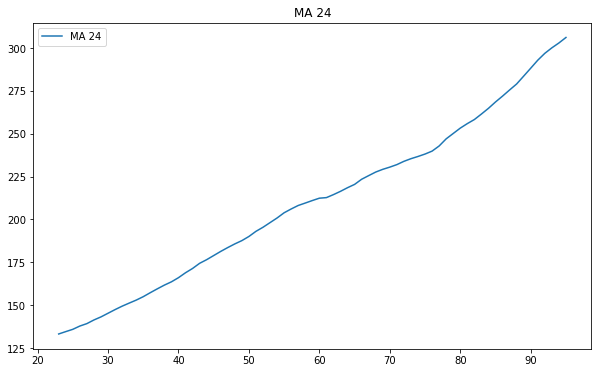

In [79]:
# Optimal Window size
plt.figure(figsize=(10,6))
df2['Passengers'].plot(label='Original Series')
plt.title('Original Series')
plt.legend()

for i in range(2,25):
    plt.figure(figsize=(10,6))
    df2['Passengers'].rolling(i).mean().plot(label='MA '+str(i))
    plt.title("MA "+str(i))
    plt.legend(loc='best')
    plt.show()

The Optimal Window Size is "4", because the data is monthly data.

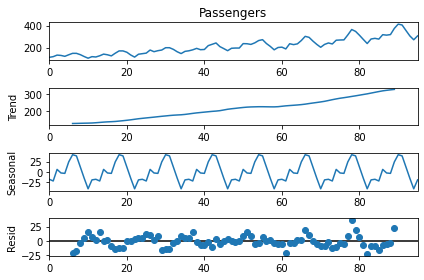

In [81]:
# Decomposition of Series

dcom=seasonal_decompose(df2['Passengers'],model='additive',period=12)
dcom.plot()
plt.show()

Decomposition of the Time Series into Trend, Seasonality and Noise.

In [87]:
# Splitting the data into train and test
train2=df2.head(70)
test2=df2.tail(26)

In [88]:
print(train2.shape,test2.shape)

(70, 2) (26, 2)


# Simple Exponential model

In [93]:
# For different smoothing level

j= np.arange(0.1,1,0.05)
m=[]
for i in j:
    se_model2=SimpleExpSmoothing(train2['Passengers']).fit(smoothing_level=i)
    se_pred2=se_model2.predict(start=test2.index[0],end=test2.index[-1])
    se_mape2=MAPE(test2['Passengers'],se_pred2)
    print("MAPE score::",np.round(se_mape2,3)," for smoothing level:: ",str(i))
    m.append((i,se_mape2))

MAPE score:: 0.201  for smoothing level::  0.1
MAPE score:: 0.185  for smoothing level::  0.15000000000000002
MAPE score:: 0.177  for smoothing level::  0.20000000000000004
MAPE score:: 0.172  for smoothing level::  0.25000000000000006
MAPE score:: 0.169  for smoothing level::  0.30000000000000004
MAPE score:: 0.169  for smoothing level::  0.3500000000000001
MAPE score:: 0.17  for smoothing level::  0.40000000000000013
MAPE score:: 0.172  for smoothing level::  0.45000000000000007
MAPE score:: 0.176  for smoothing level::  0.5000000000000001
MAPE score:: 0.179  for smoothing level::  0.5500000000000002
MAPE score:: 0.183  for smoothing level::  0.6000000000000002
MAPE score:: 0.188  for smoothing level::  0.6500000000000001
MAPE score:: 0.192  for smoothing level::  0.7000000000000002
MAPE score:: 0.197  for smoothing level::  0.7500000000000002
MAPE score:: 0.202  for smoothing level::  0.8000000000000002
MAPE score:: 0.207  for smoothing level::  0.8500000000000002
MAPE score:: 0.212

In [94]:
se_result2=pd.DataFrame(m,columns=['Smoothing_level','MAPE'])
se_result2.sort_values(by=['MAPE'])

,Smoothing_level,MAPE
5,0.35,0.169008
4,0.30,0.169440
6,0.40,0.170130
3,0.25,0.171825
7,0.45,0.172435
8,0.50,0.175590
2,0.20,0.176627
9,0.55,0.179309
10,0.60,0.183360
1,0.15,0.184714


We are getting minimum error for smoothing level=0.35

In [95]:
# Creating model with smoothing level=0.35

se_model2=SimpleExpSmoothing(train2['Passengers']).fit(smoothing_level=0.35)
se_pred2=se_model2.predict(start=test2.index[0],end=test2.index[-1])
se_mape2=MAPE(test2['Passengers'],se_pred2)
print("MAPE score::",np.round(se_mape2,3))

MAPE score:: 0.169


In [96]:
se_pred2

70    253.85536
71    253.85536
72    253.85536
73    253.85536
74    253.85536
75    253.85536
76    253.85536
77    253.85536
78    253.85536
79    253.85536
80    253.85536
81    253.85536
82    253.85536
83    253.85536
84    253.85536
85    253.85536
86    253.85536
87    253.85536
88    253.85536
89    253.85536
90    253.85536
91    253.85536
92    253.85536
93    253.85536
94    253.85536
95    253.85536
dtype: float64

# Double Exponential model

In [97]:
# For different values of smoothing_level and smoothing_trend

alpha=np.arange(0.1,1,0.1)
beta=np.arange(0.1,1,0.1)
B=[]
for i in alpha:
    for j in beta:
        de_model2=Holt(train2['Passengers']).fit(smoothing_level=i,smoothing_trend=j)
        de_pred2=de_model2.predict(start=test2.index[0],end=test2.index[-1])
        de_mape2=MAPE(test['Passengers'],de_pred2)
        print("MAPE score:: ",de_mape2,"for smoothing_level= ",i,"and for smoothing trend= ",j)
        B.append((i,j,de_mape2))

MAPE score::  0.10988350768134122 for smoothing_level=  0.1 and for smoothing trend=  0.1
MAPE score::  0.1090782431496786 for smoothing_level=  0.1 and for smoothing trend=  0.2
MAPE score::  0.10890124969355412 for smoothing_level=  0.1 and for smoothing trend=  0.30000000000000004
MAPE score::  0.12011588252298197 for smoothing_level=  0.1 and for smoothing trend=  0.4
MAPE score::  0.15186321916079404 for smoothing_level=  0.1 and for smoothing trend=  0.5
MAPE score::  0.21786669611149148 for smoothing_level=  0.1 and for smoothing trend=  0.6
MAPE score::  0.320993371316737 for smoothing_level=  0.1 and for smoothing trend=  0.7000000000000001
MAPE score::  0.43124151879198147 for smoothing_level=  0.1 and for smoothing trend=  0.8
MAPE score::  0.5358233358992983 for smoothing_level=  0.1 and for smoothing trend=  0.9
MAPE score::  0.1140769564786219 for smoothing_level=  0.2 and for smoothing trend=  0.1
MAPE score::  0.13297356056519075 for smoothing_level=  0.2 and for smooth

In [98]:
de_result2=pd.DataFrame(B,columns=['alpha','beta','MAPE'])
de_result2.sort_values(by=['MAPE'],ascending=True)

,alpha,beta,MAPE
2,0.1,0.3,0.108901
1,0.1,0.2,0.109078
0,0.1,0.1,0.109884
36,0.5,0.1,0.110895
9,0.2,0.1,0.114077
...,...,...,...
70,0.8,0.8,1.689252
61,0.7,0.8,1.695514
53,0.6,0.9,1.796822
71,0.8,0.9,1.803171


We are getting minimum error for smoothing_level=0.1 and smoothing_trend=0.3

In [99]:
# Creating model using optimal values

de_model2=Holt(train2['Passengers']).fit(smoothing_level=0.1,smoothing_trend=0.3)
de_pred2=de_model2.predict(start=test2.index[0],end=test2.index[-1])
de_mape2=MAPE(test2['Passengers'],de_pred2)
print("MAPE score:: ",np.round(de_mape2,3))

MAPE score::  0.109


In [100]:
de_pred2

70    252.746011
71    255.970618
72    259.195224
73    262.419830
74    265.644437
75    268.869043
76    272.093649
77    275.318255
78    278.542862
79    281.767468
80    284.992074
81    288.216680
82    291.441287
83    294.665893
84    297.890499
85    301.115106
86    304.339712
87    307.564318
88    310.788924
89    314.013531
90    317.238137
91    320.462743
92    323.687349
93    326.911956
94    330.136562
95    333.361168
dtype: float64

# Holt Winter's model

In [101]:
# Holt Winters model
hw_model2=ExponentialSmoothing(train2['Passengers'],trend='add',seasonal='add',seasonal_periods=12).fit()
hw_pred2=hw_model2.predict(start=test2.index[0],end=test2.index[-1])
hw_mape2=MAPE(test2['Passengers'],hw_pred2)
print("MAPE score:: ",np.round(hw_mape2,3))

MAPE score::  0.108


In [103]:
hw_model2.forecast(10)

70    209.019029
71    229.633799
72    232.058488
73    234.565688
74    260.741329
75    253.251093
76    252.256816
77    272.752752
78    293.739156
79    295.563840
dtype: float64

# Holt Winter's model is the best fit because it is giving minimum error and also it is following the trend of the data.